# Projeto 3 - Ciência dos Dados
________

### Elisa Malzoni e Bruno Leite

Após a decisão de trabalhar com expectativa de vida, procuramos variáveis diversas que se relacionam com a expectativa de vida. Os gráficos do GapMinder que nos chamaram atenção estão apresentados a seguir:

<img src="rendaimg.png">
<img src="cpmimg.png">
<img src="fsimg.png">
<img src="mortcimg.png">
<img src="tfrimg.png">

Após a análise dos gráficos e pensando um pouco sobre a motivação do projeto, chegamos à seguinte pergunta: **Como as condições de vida das pessoas influenciam em suas respectivas expectativas de vida?**

Com essa pergunta conseguimos escolher as duas variáveis que nos eram de maior interesse: renda per capta e suprimento alimentício.

In [27]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as smf  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Avell G1511 FIRE V3\Documents\GitHub\CDP3


In [55]:
ExpVida = pd.read_excel('life.xlsx', index_col=0)
PIB = pd.read_excel('gdp.xlsx', index_col=0)
SupAli = pd.read_excel('food.xlsx', index_col=0)

In [56]:
dados = pd.DataFrame()

In [57]:
dados = ExpVida.join(PIB, how="outer")
dados = dados.join(SupAli, how="outer")

In [58]:
dados = dados[~np.isnan(dados.ExpVida)]
dados = dados[~np.isnan(dados.PIB)]
dados = dados[~np.isnan(dados.SupAli)]

In [59]:
dados.PIB= np.log(dados.PIB)

In [60]:
dados.head()

,ExpVida,PIB,SupAli
Albania,76.6,8.984318,2879.57
Algeria,75.3,9.416460,3153.38
Angola,56.2,8.772300,1973.29
Antigua and Barbuda,75.3,10.166159,2368.50
Argentina,75.2,9.537700,2940.98


Correlação entre Expectativa de Vida e PIB/capita: 0.778006764401
Correlação entre Expectativa de Vida e Suprimento de Alimento: 0.68106284291


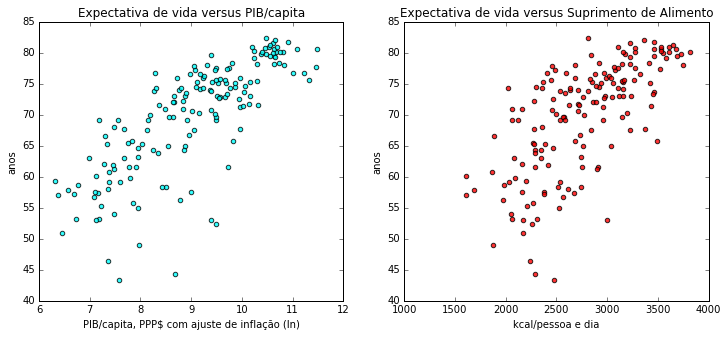

In [34]:
%matplotlib inline
f, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].scatter(dados.PIB, dados.ExpVida,c='cyan', alpha=0.8)
ax[0].set_title('Expectativa de vida versus PIB/capita')
ax[0].set_xlabel('PIB/capita, PPP$ com ajuste de inflação (ln)')
ax[0].set_ylabel('anos')


print("Correlação entre Expectativa de Vida e PIB/capita:",np.corrcoef(dados.PIB, dados.ExpVida)[0,1])

ax[1].scatter(dados.SupAli, dados.ExpVida,c='red', alpha=0.8)
ax[1].set_title('Expectativa de vida versus Suprimento de Alimento')
ax[1].set_xlabel('kcal/pessoa e dia')
ax[1].set_ylabel('anos')


print("Correlação entre Expectativa de Vida e Suprimento de Alimento:",np.corrcoef(dados.SupAli, dados.ExpVida)[0,1])

## Etapa 2
______

Regressão linear

In [35]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = eval(formula)
    plt.plot(x, y)  
    plt.show()

#MMQ
#PIB/capita
somaxy = 0
somax = 0
somay = 0
somax2 = 0
n= dados.count()[0]
for i in range(n):
    
    somaxy += dados.PIB[i]*dados.ExpVida[i]
    somax += dados.PIB[i]
    somay +=dados.ExpVida[i]
    somax2 += (dados.PIB[i])**2
    
b1 = ((n * somaxy) - (somax * somay))/((n*somax2) - (somax)**2)
b0 = (somay - somax *b1)/n

In [36]:
print(b1, b0)

5.58880304928 19.350879676


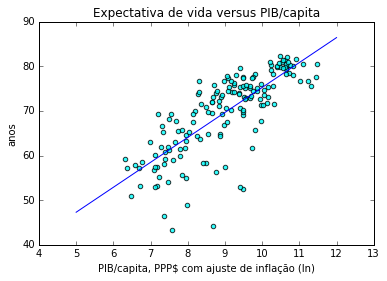

In [37]:
%matplotlib inline
plt.scatter(dados.PIB, dados.ExpVida,c='cyan', alpha=0.8)
plt.title('Expectativa de vida versus PIB/capita')
plt.xlabel('PIB/capita, PPP$ com ajuste de inflação (ln)')
plt.ylabel('anos')
graph("b1*x + b0", range(5,13))
plt.show()

In [38]:
#Suprimento Alimentício
somaxyf = 0
somaxf = 0
somayf = 0
somax2f = 0
n= dados.count()[0]
for i in range(n):
    somaxyf += dados.SupAli[i]*dados.ExpVida[i]
    somaxf += dados.SupAli[i]
    somayf +=dados.ExpVida[i]
    somax2f += (dados.SupAli[i])**2
    
b1f = ((n * somaxyf) - (somaxf * somayf))/((n*somax2f) - (somaxf)**2)
b0f = (somayf - somaxf *b1f)/n
print(b1f, b0f)

0.0121334340063 36.163535465


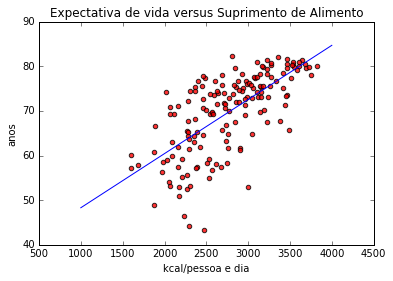

In [39]:
%matplotlib inline
plt.scatter(dados.SupAli, dados.ExpVida,c='red', alpha=0.8)
plt.title('Expectativa de vida versus Suprimento de Alimento')
plt.xlabel('kcal/pessoa e dia')
plt.ylabel('anos')
graph("b1f*x + b0f", range(1000,4000))
plt.show()

## Etapa 3
_______

In [40]:
dados.corr(method='pearson')

,ExpVida,PIB,SupAli
ExpVida,1.000000,0.778007,0.681063
PIB,0.778007,1.000000,0.782662
SupAli,0.681063,0.782662,1.000000


In [41]:
dados.ExpVida.describe()

count    163.000000
mean      69.762577
std        8.984438
min       43.300000
25%       63.500000
50%       72.300000
75%       76.700000
max       82.400000
Name: ExpVida, dtype: float64

In [42]:
dados.PIB.describe()

count    163.000000
mean       9.020124
std        1.250707
min        6.318968
25%        7.963240
50%        9.110188
75%        9.972640
max       11.474652
Name: PIB, dtype: float64

In [43]:
dados.SupAli.describe()

count     163.000000
mean     2769.128773
std       504.306298
min      1605.080000
25%      2364.555000
50%      2754.900000
75%      3153.705000
max      3818.800000
Name: SupAli, dtype: float64

# Modelo de Regressão Múltipla
-------

<IPython.core.display.Javascript object>


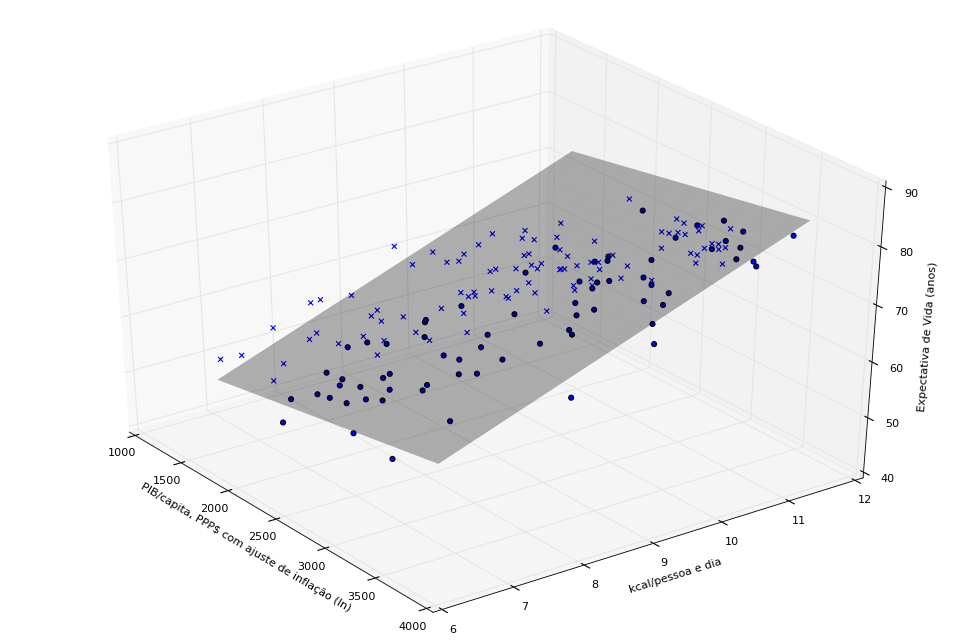

In [100]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

X = dados[['SupAli', 'PIB']]
y = dados['ExpVida']

## fit a OLS model with intercept on SupAli e PIB
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

## Create the 3d plot
# SupAli/PIB grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.SupAli.min(), X.SupAli.max(), 100), 
                       np.linspace(X.PIB.min(), X.PIB.max(), 100))

# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# cria matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot Superficie
surf = ax.plot_surface(xx1, xx2, Z, alpha=0.3, color='None',linewidth=0)

# pontos acima da superfície são x, pontos abaixo são o
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].SupAli, X[resid >= 0].PIB, y[resid >= 0], marker='x', alpha=1.0)
ax.scatter(X[resid < 0].SupAli, X[resid < 0].PIB, y[resid < 0], marker='o', alpha=1.0)

# set axis labels
ax.set_xlabel('PIB/capita, PPP$ com ajuste de inflação (ln)')
ax.set_ylabel('kcal/pessoa e dia')
ax.set_zlabel('Expectativa de Vida (anos)')

<img src="grafico1.png">
<img src="grafico2.png">
<img src="grafico3.png">

In [45]:
#Dados
y=dados.ExpVida
X=dados.iloc[:,(1,2)]
X=sm.add_constant(X)
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ExpVida   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     129.8
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           3.15e-34
Time:                        15:42:43   Log-Likelihood:                -510.06
No. Observations:                 163   AIC:                             1026.
Df Residuals:                     160   BIC:                             1035.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         19.6079      3.195      6.137      0.000        13.298    25.918
PIB            4.5419      0.563      8.062      0.000         3.429     5.654
SupAli         0.0033      0.001      2.374      0.019         0.001     0.006
==============================================================================
Omnibus:                       43.907   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.842
Skew:                          -1.230   Prob(JB):                     8.42e-20
Kurtosis:                       5.624   Cond. No.                     2.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\hat{ExpVida} = \hat{\beta_0} + \hat{\beta_1} \cdot PIB + \hat{\beta_2} \cdot SupAli \Rightarrow \hat{ExpVida} = 19.6079 + 4.5419 \cdot PIB + 0.0033 \cdot SupAli$   

Para verificar se as variáveis são relevantes ao modelo, utilizaremos o teste de hipóteses seguinte para todos os $\hat{\beta}$:
       
$H_0: \hat{\beta} = 0$ : Variável não relevante ao modelo

$H_1: \hat{\beta} \neq 0 $ : Variável relevante ao modelo

Com base na tabela acima é observado que os valores-p estão bem abaixo de 10% (nível de significancia: 5%), e portanto é possível reijeitar $H_0$.

Em suma, cunclui-se que que as variaveís são relevantes ao modelo.


Não será interessante interpretar o intercepto ($\hat{\beta}_0$), interpretaremos $\hat{\beta}_1$ e $\hat{\beta}_2$.

$\hat{\beta}_1:$ coeficiente angular estimado (PIB/capita, PPP$ com ajuste de inflação (ln))

$\hat{\beta}_2:$ coeficiente angular estimado(Suprimento Alimentício, kcal/pessoa e dia)



## Análise de resíduos
_______

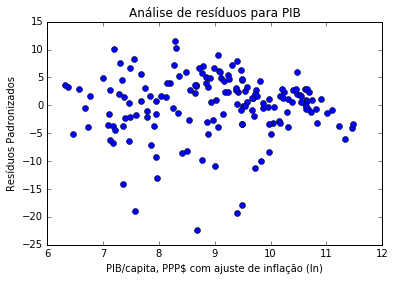

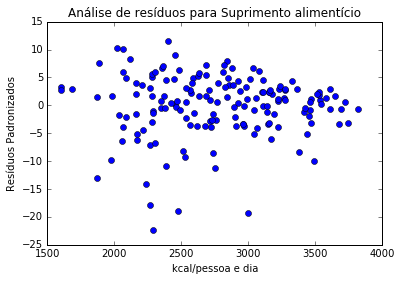

In [50]:
%matplotlib inline
plt.plot(dados.PIB, fit.resid, 'o')
plt.title('Análise de resíduos para PIB')
plt.xlabel('PIB/capita, PPP$ com ajuste de inflação (ln)')
plt.ylabel('Resíduos Padronizados')
plt.show()

plt.plot(dados.SupAli, fit.resid, 'o')
plt.title('Análise de resíduos para Suprimento alimentício')
plt.xlabel('kcal/pessoa e dia')
plt.ylabel('Resíduos Padronizados')
plt.show()

Após a análise dos resíduos, pudemos perceber que a nossa distribuição de erros comporta-se aproximadamente como uma ideal. Ou seja, nossos erros estão localizados em torno do 0 (zero) de maneira bem distribuída.

## Interpretação dos parâmetros
-------

Com base nos parâmetros dos coeficientes angulares ($\beta_1$ e $\beta_2$), pode-se efetuar algumas interpretações. $\beta_1$ (coeficiente angular que relaciona PIB per capita com a expectativa de vida) valendo aproximadamente 4,5 significa que com o aumento de 10% do PIB per capita de um país, haverá o aumento – previsto – de aproximadamente 0,45 anos na expectativa de vida do mesmo. Já $\beta_2$ (coeficiente angular que relaciona Suprimento Alimenticio com a expectativa de vida) com o valor aproximado de 0,0033, significa que com o aumento de 1000 kcal por pessoa e dia (metade do recomendado), haverá o aumento estimado de 3,3 anos na expectativa de vida.

## Objetivos
-------

O objetivo principal do projeto é entender de que forma a variação do PIB per capta e do suprimento alimentício de um país podem afetar a expectativa de vida nele. Em outras palavras, o objetivo é ver como as condições de vida da população dos países afeta a expectativa de vida da mesma. Para isso verificamos se o modelo é bom pelo $R^2$ e via teste de hipóteses.

$R^2$: Coeficiente de determinação - Quão bem os valores se ajustam ao modelo, e  $ 0 \ge R^2 \ge 1$, o melhor ajuste se dá quando o $R^2$ é próximo de 1. No nosso caso $R^2=0.619$, o que mostra que o modelo é bom para nossas variáveis.

## Verificação se o modelo é bom quando os países são divididos em subgrupos
________

In [74]:
ExpVida = pd.read_excel('life.xlsx', index_col=0)
PIB = pd.read_excel('gdp.xlsx', index_col=0)
SupAli = pd.read_excel('food.xlsx', index_col=0)
IDH = pd.read_excel('IDH.xlsx', index_col=0)

In [75]:
dados1 = pd.DataFrame()

In [76]:
dados1 = ExpVida.join(PIB, how="outer")
dados1 = dados1.join(SupAli, how="outer")
dados1 = dados1.join(IDH, how="outer")

In [79]:
dados1 = dados1[~np.isnan(dados1.ExpVida)]
dados1 = dados1[~np.isnan(dados1.PIB)]
dados1 = dados1[~np.isnan(dados1.SupAli)]
dados1 = dados1[~np.isnan(dados1.IDH)]

In [80]:
dados1.PIB= np.log(dados.PIB)

In [82]:
dados1.tail()

,ExpVida,PIB,SupAli,IDH
Uzbekistan,69.2,2.098146,2581.11,0.619
Venezuela,74.4,2.278123,2631.90,0.720
Vietnam,73.8,2.112698,2816.25,0.575
Zambia,49.0,2.076037,1873.04,0.405
Zimbabwe,46.4,1.995728,2237.75,0.350


In [94]:
#criando novos dataframes separados para desenvolvimento
desenvolvidos = dados1[(dados1.IDH >= 0.75)]
desenvolvimento = dados1[(dados1.IDH >= 0.5) & (dados1.IDH < 0.75)]
subdesenvolvido = dados1[(dados1.IDH <0.5)]

In [95]:
#países desenvolvidos
y=desenvolvidos.ExpVida
X=desenvolvidos.iloc[:,(1,2)]
X=sm.add_constant(X)
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ExpVida   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     16.13
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           3.92e-06
Time:                        16:23:27   Log-Likelihood:                -123.39
No. Observations:                  53   AIC:                             252.8
Df Residuals:                      50   BIC:                             258.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          9.7424     17.380      0.561      0.578       -25.167    44.652
PIB           24.8469      8.124      3.058      0.004         8.528    41.165
SupAli         0.0031      0.001      2.605      0.012         0.001     0.005
==============================================================================
Omnibus:                        1.392   Durbin-Watson:                   1.709
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.327
Skew:                          -0.365   Prob(JB):                        0.515
Kurtosis:                       2.737   Cond. No.                     1.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
#países em desenvolvimneto
y=desenvolvimento.ExpVida
X=desenvolvimento.iloc[:,(1,2)]
X=sm.add_constant(X)
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ExpVida   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.887
Date:                Tue, 06 Dec 2016   Prob (F-statistic):             0.0637
Time:                        16:23:27   Log-Likelihood:                -203.78
No. Observations:                  62   AIC:                             413.6
Df Residuals:                      59   BIC:                             419.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         37.3769     30.623      1.221      0.227       -23.901    98.654
PIB            9.0402     15.419      0.586      0.560       -21.812    39.893
SupAli         0.0047      0.003      1.711      0.092        -0.001     0.010
==============================================================================
Omnibus:                       23.645   Durbin-Watson:                   2.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.976
Skew:                          -1.445   Prob(JB):                     2.54e-08
Kurtosis:                       5.278   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
#países subdesenvolvidos
y=subdesenvolvido.ExpVida
X=subdesenvolvido.iloc[:,(1,2)]
X=sm.add_constant(X)
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ExpVida   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.7953
Date:                Tue, 06 Dec 2016   Prob (F-statistic):              0.459
Time:                        16:24:05   Log-Likelihood:                -126.86
No. Observations:                  40   AIC:                             259.7
Df Residuals:                      37   BIC:                             264.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         29.2832     25.318      1.157      0.255       -22.016    80.582
PIB           13.2484     13.639      0.971      0.338       -14.386    40.883
SupAli         0.0014      0.004      0.371      0.712        -0.006     0.009
==============================================================================
Omnibus:                        2.946   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.229   Jarque-Bera (JB):                1.963
Skew:                          -0.519   Prob(JB):                        0.375
Kurtosis:                       3.315   Cond. No.                     6.81e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
#todos
y=dados1.ExpVida
X=dados1.iloc[:,(1,2)]
X=sm.add_constant(X)
X.head()

model=sm.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ExpVida   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     125.5
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           6.47e-33
Time:                        16:31:14   Log-Likelihood:                -486.21
No. Observations:                 155   AIC:                             978.4
Df Residuals:                     152   BIC:                             987.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -24.9707      8.692     -2.873      0.005       -42.143    -7.798
PIB           38.1054      5.346      7.127      0.000        27.542    48.668
SupAli         0.0041      0.002      2.674      0.008         0.001     0.007
==============================================================================
Omnibus:                       44.765   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.491
Skew:                          -1.299   Prob(JB):                     2.24e-20
Kurtosis:                       5.694   Cond. No.                     6.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Após os países serem divididos em subgrupos (desenvolvidos, em desenvolvimento e subdesenvolvidos) analisamos seus coeficientes de determinação $(R^2)$ com base no modelo de regressão (por OLS). Foi observado que, com os países subcategorizados desta forma, os valores não se ajustam bem ao modelo. Os valores obtidos dos coeficientes de determinação foram 0.392 , 0.089 e 0.041 respectivamente para desenvolvidos, em desenvolvimento e subdesenvolvidos. Em suma, conclui-se, que nosso modelo se adequa apenas em uma escala global e não local (em subcategorias).

## Conclusão
____________

Retomando a pergunta feita no início do estudo, "**Como as condições de vida das pessoas influenciam em suas respectivas expectativas de vida?**". Com base nas análises observamos que nosso modelo se comportou – de maneira geral – como o esperado. Ou seja, vimos que quanto maior é o suprimento alimentício, maior será a expectativa de determinada população. Da mesma maneira ocorre com o PIB – quanto maior seu PIB, maior sua expectativa de vida.


Chegamos a tal conclusão com base em tais resultados:

-	Inclinação do plano construído: com a construção do plano que relaciona a variável resposta *expectativa de vida* e as variáveis explicativas  *PIB per capita* e *suprimento alimentício*, pôde-se observar que enquanto qualquer uma das variáveis explicativas aumenta, a expectativa de vida aumentará.

-	Modelo de regressão: a partir do modelo de regressão feito, chegou-se em coeficientes angulares do plano ($\hat{\beta_1}$ e $\hat{\beta_2}$) positivos. Isso significa que haverá uma relação positiva entre as variáveis explicativas e a variável resposta.

-	Teste de hipótese: com o teste feito para $\hat{\beta}$ (o qual foi feito de maneira genérica pois valia para $\hat{\beta_0}$, $\hat{\beta_1}$ e $\hat{\beta_2}$), criou-se a hipótese nula ($H_0$) de que o $\hat{\beta}$ seria igual a 0 foi rejeitada e, portanto, os coeficientes eram – de fato – influentes em nosso modelo.

